<a href="https://colab.research.google.com/github/goldiezhu/BIS634/blob/main/A2/A2_E4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

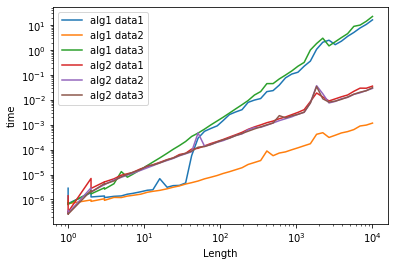

In [1]:
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt

def alg1(data):
  data = list(data)
  changes = True
  while changes:
    changes = False
    for i in range(len(data) - 1):
      if data[i + 1] < data[i]:
        data[i], data[i + 1] = data[i + 1], data[i]
        changes = True
  return data

def alg2(data):
  if len(data) <= 1:
    return data
  else:
    split = len(data) // 2
    left = iter(alg2(data[:split]))
    right = iter(alg2(data[split:]))
    result = []
    # note: this takes the top items off the left and right piles
    left_top = next(left)
    right_top = next(right)
    while True:
      if left_top < right_top:
        result.append(left_top)
        try:
          left_top = next(left)
        except StopIteration:
          # nothing remains on the left; add the right + return
          return result + [right_top] + list(right)
      else:
        result.append(right_top)
        try:
          right_top = next(right)
        except StopIteration:
          # nothing remains on the right; add the left + return
          return result + [left_top] + list(left)

def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

def data2(n):
    return list(range(n))

def data3(n):
    return list(range(n, 0, -1))


log_n = list(np.logspace(0, 4, dtype = int))
alg1data1_time = []
alg1data2_time = []
alg1data3_time = []
alg2data1_time = []
alg2data2_time = []
alg2data3_time = []

for n in log_n:

  data1_list = data1(n)
  data2_list = data2(n)
  data3_list = data3(n)

  alg1data1_start = perf_counter()
  alg1(data1_list)
  alg1data1_stop = perf_counter()
  alg1data1_time.append(alg1data1_stop - alg1data1_start)

  alg1data2_start = perf_counter()
  alg1(data2_list)
  alg1data2_stop = perf_counter()
  alg1data2_time.append(alg1data2_stop - alg1data2_start)

  alg1data3_start = perf_counter()
  alg1(data3_list)
  alg1data3_stop = perf_counter()
  alg1data3_time.append(alg1data3_stop - alg1data3_start)

  alg2data1_start = perf_counter()
  alg2(data1_list)
  alg2data1_stop = perf_counter()
  alg2data1_time.append(alg2data1_stop - alg2data1_start)

  alg2data2_start = perf_counter()
  alg2(data2_list)
  alg2data2_stop = perf_counter()
  alg2data2_time.append(alg2data2_stop - alg2data2_start)

  alg2data3_start = perf_counter()
  alg2(data3_list)
  alg2data3_stop = perf_counter()
  alg2data3_time.append(alg2data3_stop - alg2data3_start)

plt.loglog(log_n, alg1data1_time, label = 'alg1 data1')
plt.loglog(log_n, alg1data2_time, label = 'alg1 data2')
plt.loglog(log_n, alg1data3_time, label = 'alg1 data3')
plt.loglog(log_n, alg2data1_time, label = 'alg2 data1')
plt.loglog(log_n, alg2data2_time, label = 'alg2 data2')
plt.loglog(log_n, alg2data3_time, label = 'alg2 data3')
plt.xlabel('Length')
plt.ylabel('time')

plt.legend(loc=0)

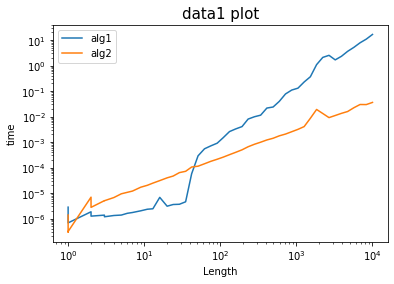

In [2]:
plt.title('data1 plot', fontsize=15)
plt.loglog(log_n, alg1data1_time, label = 'alg1')
plt.loglog(log_n, alg2data1_time, label = 'alg2')
plt.xlabel('Length')
plt.ylabel('time')
plt.legend(loc=0)

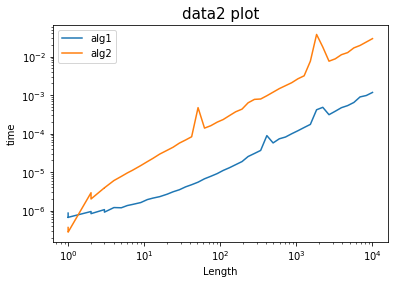

In [3]:
plt.title('data2 plot', fontsize=15)
plt.loglog(log_n, alg1data2_time, label = 'alg1')
plt.loglog(log_n, alg2data2_time, label = 'alg2')
plt.xlabel('Length')
plt.ylabel('time')
plt.legend(loc=0)

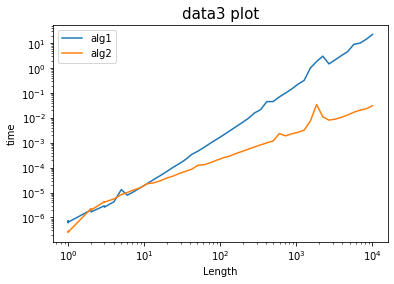

In [4]:
plt.title('data3 plot', fontsize=15)
plt.loglog(log_n, alg1data3_time, label = 'alg1')
plt.loglog(log_n, alg2data3_time, label = 'alg2')
plt.xlabel('Length')
plt.ylabel('time')
plt.legend(loc=0)

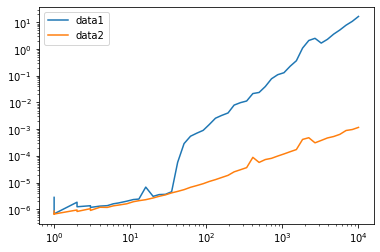

In [5]:
plt.loglog(title = 'alg 2 plot')
plt.loglog(log_n, alg1data1_time, label = 'data1')
plt.loglog(log_n, alg1data2_time, label = 'data2')
plt.legend(loc=0)

In [13]:
data = [1,7,8,3,4,5,6]
alg1(data)

[1, 3, 4, 5, 6, 7, 8]

In [8]:
data = [1,7,8,3,4,5,6]
alg2(data)

[1, 3, 4, 5, 6, 7, 8]

In [9]:
data = [30,103,290,1,304,230,1010,594]
alg1(data)

[1, 30, 103, 230, 290, 304, 594, 1010]

In [10]:
data = [30,103,290,1,304,230,1010,594]
alg2(data)

[1, 30, 103, 230, 290, 304, 594, 1010]

In [11]:
data = [813,23,94,501,293,192]
alg1(data)

[23, 94, 192, 293, 501, 813]

In [12]:
data = [813,23,94,501,293,192]
alg2(data)

[23, 94, 192, 293, 501, 813]

Hypothesis: The two functions order the list from least to greatest.

alg1 iterates thru a list of numbers and arranges them from least to greatest. After making sure that the input is a list, the boolean value "changes" makes sure that the "while" function hasn't reached the end of the list yet. The for loop in the while loop switches the places of two numbers if the second number is smaller than the first one. If "changes" is False, then the while loop ends and it returns the ordered list.

alg2 first checks if the inputted list is longer than one number. If it is, then the inputted list is split into two halves. 'left' and 'right' are iterators that iterate thru their respective halves of the split. While the iterators haven't reached the end of the list (False), the values of the left and right halves are compared and the smaller one is appended to the results list. If the two halves are not the same size, the loop will reach 'StopIteration,' which will exit the loop and return the ordered list.

alg2 is better